In [1]:
import numpy as np
def get_column(data, index):
    result = [row[index] for row in data]
    return result

def prepare_data(file_name_dataset):
    data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()
    N = len(data)

    # get tv (index=0)
    tv_data = get_column(data, 0)

    # get radio (index=1)
    radio_data = get_column(data, 1)

    # get newspaper (index=2)
    newspaper_data = get_column(data, 2)

    # get sales (index=3)
    sales_data = get_column(data, 3)

    # building X input and y output for training
    X = [tv_data, radio_data, newspaper_data]
    y = sales_data

    return X, y

In [2]:
X, y = prepare_data("advertising.csv")

In [15]:
sums = [sum(X[0][:5]), sum(X[1][:5]), sum(X[2][:5]), sum(y[:5])]
print(sums)


[624.1, 175.10000000000002, 300.5, 78.9]


In [7]:
def initialize_params():
    w1, w2, w3, b = (0.016992259082509283, 0.0070783670518262355, -0.002307860847821344, 0)
    return w1, w2, w3, b

def predict (x1, x2, x3, w1, w2, w3, b):
    result = w1*x1 + w2*x2 + w3*x3 + b
    return result

y = predict( x1 =1 , x2 =1 , x3 =1 , w1 =0 , w2 =0.5 , w3 =0 , b =0.5)
print (y)

1.0


In [19]:
def compute_loss(y_hat, y):
    loss = (y_hat - y)**2
    return loss

l = compute_loss( y_hat =1 , y =0.5)
print (l)

0.25


In [15]:
def compute_gradient_wi(xi, y, y_hat):
    dl_dwi = 2*xi*(y_hat-y)
    return dl_dwi

def compute_gradient_b(y, y_hat):
    dl_db = 2*(y_hat-y)
    return dl_db

g_wi = compute_gradient_wi ( xi =1.0 , y =1.0 , y_hat =0.5)
print ( g_wi )

g_b = compute_gradient_b ( y =2.0 , y_hat =0.5)
print ( g_b )

-1.0
-3.0


In [13]:
def update_weight_wi(wi, dl_dwi, lr):
    wi = wi - lr*dl_dwi
    return wi

def update_weight_b(b, dl_db, lr):
    b = b - lr*dl_db
    return b

after_wi = update_weight_wi ( wi =1.0 , dl_dwi = -0.5 , lr = 1e-5)
print ( after_wi )

1.000005


In [25]:
after_b = update_weight_b ( b =0.5 , dl_db = -1.0 , lr = 1e-5)
print ( after_b )

0.50001


In [26]:
def implement_linear_regression(X_data, y_data, epoch_max=50, lr=1e-5):
    losses = []

    w1, w2, w3, b = initialize_params()

    N = len(y_data)
    for epoch in range(epoch_max):
        for i in range(N):
            # Get a sample
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]
            y = y_data[i]

            # Compute output
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            # Compute loss
            loss = compute_loss(y, y_hat)

            # Compute gradient w1, w2, w3, b
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)

            # Update parameters
            w1 = update_weight_wi(w1, dl_dw1, lr)
            w2 = update_weight_wi(w2, dl_dw2, lr)
            w3 = update_weight_wi(w3, dl_dw3, lr)
            b = update_weight_b(b, dl_db, lr)

            # Logging
            losses.append(loss)

    return w1, w2, w3, b, losses



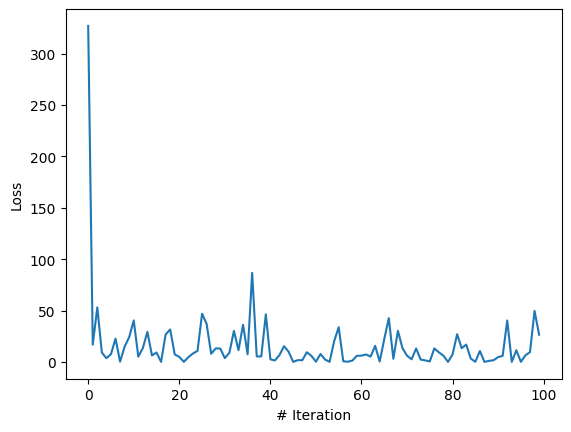

In [30]:
w1, w2, w3, b, losses = implement_linear_regression(X, y)
plt.plot(losses[:100])
plt.xlabel("# Iteration")
plt.ylabel("Loss")
plt.show()

In [31]:
print ( w1 , w2 , w3 )

0.07405984066396477 0.15917360263437663 0.017561197559948935


In [32]:
# given new data
tv = 19.2
radio = 35.9
newspaper = 51.3
X , y = prepare_data('advertising.csv')
(w1, w2, w3, b, losses) = implement_linear_regression(X, y, epoch_max=50, lr=1e-5)
sales = predict(tv ,radio ,newspaper ,w1 ,w2 ,w3 ,b )
print (f'predicted sales is {sales}')

predicted sales is 8.176413319549823


In [33]:
def compute_loss_mae(y_hat, y):
    return abs(y_hat-y)

l = compute_loss_mae( y_hat =1, y =0.5)
print(l)

0.5


In [3]:

def compute_loss_mse(y, y_hat):
    return (y - y_hat)**2

def compute_loss_mae(y,y_hat):
    return abs(y-y_hat)

def implement_linear_regression_nsamples(X_data, y_data, epoch_max=50, lr=1e-5):
    losses = []

    w1, w2, w3, b = initialize_params()
    N = len(y_data)

    for epoch in range(epoch_max):
        loss_total = 0.0
        dw1_total = 0.0
        dw2_total = 0.0
        dw3_total = 0.0
        db_total = 0.0

        for i in range(N):
            # Get a sample
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]
            y = y_data[i]

            # Compute output
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            # Compute loss
            loss = compute_loss_mse(y, y_hat)

            # Accumulate loss
            loss_total += loss

            # Compute gradient w1, w2, w3, b
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)

            # Accumulate gradient w1, w2, w3, b
            # Update parameters
            

            dw1_total += dl_dw1
            dw2_total += dl_dw2
            dw3_total += dl_dw3 
            db_total += dl_db

        # (After processing N samples) - Update parameters
        # your code here **************
        w1 = update_weight_wi(w1, dw1_total / N, lr)
        w2 = update_weight_wi(w2, dw2_total / N, lr)
        w3 = update_weight_wi(w3, dw3_total / N, lr)
        b = update_weight_b(b, db_total / N, lr)
        # Logging
        losses.append(loss_total / N)

    return w1, w2, w3, b, losses


[172.98395547828923, 39.4081674745134, 18.15746728564735, 14.634633779162357, 13.913880074022757, 13.640049637323427, 13.441395294810789, 13.259118517018994, 13.083802587178743, 12.913826664416215, 12.748804182322559, 12.58854742072041, 12.432904005847659, 12.281730988201284, 12.134890631437667, 11.992249630675893, 11.853678875589457, 11.719053303032835, 11.588251767260099, 11.461156916275085, 11.33765507239911, 11.217636116651946, 11.100993376782947, 10.987623518830576, 10.877426442098113, 10.77030517743778, 10.666165788738786, 10.564917277518694, 10.466471490519933, 10.370743030217112, 10.277649168143098, 10.187109760945372, 10.099047169086274, 10.013386178104167, 9.930053922354572, 9.848979811153313, 9.770095457245782, 9.69333460752933, 9.61863307595747, 9.545928678557278, 9.475161170493593, 9.406272185115144, 9.339205174920474, 9.273905354383018, 9.210319644576826, 9.148396619546123, 9.088086454363877, 9.029340874825948, 8.972113108729593, 8.916357838686066, 8.86203115641928, 8.809

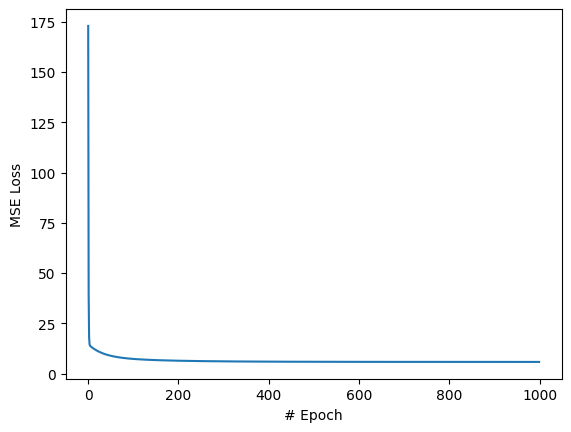

In [17]:
import matplotlib.pyplot as plt
w1, w2, w3, b, losses = implement_linear_regression_nsamples(X, y, epoch_max=1000, lr=1e-5)
print(losses)
plt.plot(losses)
plt.xlabel("# Epoch")
plt.ylabel("MSE Loss")
plt.show()


In [10]:
X , y = prepare_data('advertising.csv')

In [11]:
def initialize_params():
    w1, w2, w3, b = (0.016992259082509283, 0.0070783670518262355, -0.002307860847821344, 0)
    return w1, w2, w3, b

In [16]:
( w1 , w2 , w3 ,b , losses ) = implement_linear_regression_nsamples(X , y ,epoch_max =1000 ,lr =1e-5)
print(w1,w2,w3)

0.06710990754044266 0.15756173831487585 0.029619799386084403


In [27]:
import numpy as np

def prepare_data(file_name_dataset):
    # Load data from the dataset, skipping the header
    data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()
    
    # Extract individual columns for features
    tv_data = get_column(data, 0)
    radio_data = get_column(data, 1)
    newspaper_data = get_column(data, 2)
    
    # Extract target variable (sales)
    sales_data = get_column(data, 3)
    
    # Build X (input) and y (output) for training
    X = [[1, tv, radio, newspaper] for tv, radio, newspaper in zip(tv_data, radio_data, newspaper_data)]
    y = sales_data

    return X, y

import random

def initialize_params():
    # Initialize bias and weights
    bias = 0
    weights = [random.gauss(mu=0.0, sigma=0.01) for _ in range(3)]
    
    # For testing purposes, return a fixed set of values
    # Comment out the next line for real applications
    return [0, -0.01268850433497871, 0.004752496982185252, 0.0073796171538643845]

In [31]:
# Predict output by using y = x0*b + x1*w1 + x2*w2 + x3*w3
import numpy as np

def predict(X_features, weights):
    X_features = np.array(X_features)
    weights = np.array(weights)
    result = np.dot(X_features, weights)
    return result

def compute_loss(y_hat, y):
    return (y_hat - y)**2

# Compute gradient
def compute_gradient_w(X_features, y, y_hat):
    dl_dw1 = 2*X_features[0]*(y_hat-y)
    dl_dw2 = 2*X_features[1]*(y_hat-y)
    dl_dw3 = 2*X_features[2]*(y_hat-y)
    dl_db = 2*(y_hat-y)
    
    dl_dweights = [dl_db, dl_dw1, dl_dw2, dl_dw3]
    return dl_dweights

# Update weights
def update_weight(weights, dl_dweights, lr):
    b, w1, w2, w3 = weights
    dl_db, dl_w1, dl_w2, dl_w3 = dl_dweights 
    b = b - lr*dl_db
    w1 = w1 - lr*dl_w1
    w2 = w2 - lr*dl_w2
    w3 = w3 - lr*dl_w3
    weights = [b, w1, w2, w3]
    return weights


Epoch: 0
Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
Epoch: 11
Epoch: 12
Epoch: 13
Epoch: 14
Epoch: 15
Epoch: 16
Epoch: 17
Epoch: 18
Epoch: 19
Epoch: 20
Epoch: 21
Epoch: 22
Epoch: 23
Epoch: 24
Epoch: 25
Epoch: 26
Epoch: 27
Epoch: 28
Epoch: 29
Epoch: 30
Epoch: 31
Epoch: 32
Epoch: 33
Epoch: 34
Epoch: 35
Epoch: 36
Epoch: 37
Epoch: 38
Epoch: 39
Epoch: 40
Epoch: 41
Epoch: 42
Epoch: 43
Epoch: 44
Epoch: 45
Epoch: 46
Epoch: 47
Epoch: 48
Epoch: 49


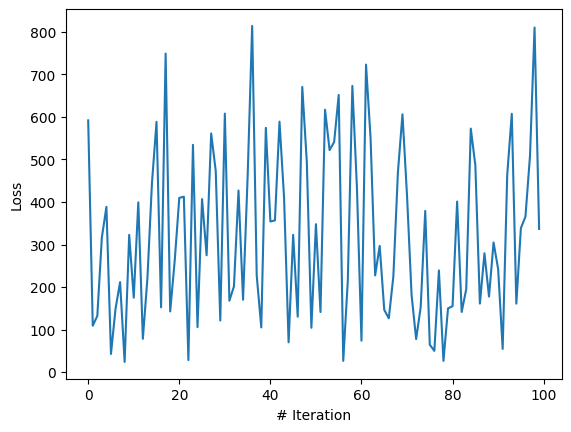

In [29]:
def implement_linear_regression(X_feature, y_output, epoch_max=50, lr=1e-5):
    losses = []
    weights = initialize_params()
    N = len(y_output)

    for epoch in range(epoch_max):
        print("Epoch:", epoch)
        for i in range(N):
            # Get a sample - row i
            features_i = X_feature[i]
            y = y_output[i]

            # Compute output
            y_hat = predict(features_i, weights)

            # Compute loss
            loss = compute_loss(y, y_hat)

            # Compute gradient w1, w2, w3, b
            dl_dweights = compute_gradient_w(features_i, y, y_hat)

            # Update parameters
            weights = update_weight(weights, dl_dweights, lr)

            # Logging
            losses.append(loss)

    return weights, losses

# Prepare data and implement linear regression
X, y = prepare_data('advertising.csv')
W, L = implement_linear_regression(X, y)


# Plot loss
plt.plot(L[:100])
plt.xlabel("# Iteration")
plt.ylabel("Loss")
plt.show()


In [30]:
X, y = prepare_data('advertising.csv')
W, L = implement_linear_regression(X, y, epoch_max =50, lr =1e-5)
# Print loss value at iteration 9999
print(L[9999])

Epoch: 0
Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
Epoch: 11
Epoch: 12
Epoch: 13
Epoch: 14
Epoch: 15
Epoch: 16
Epoch: 17
Epoch: 18
Epoch: 19
Epoch: 20
Epoch: 21
Epoch: 22
Epoch: 23
Epoch: 24
Epoch: 25
Epoch: 26
Epoch: 27
Epoch: 28
Epoch: 29
Epoch: 30
Epoch: 31
Epoch: 32
Epoch: 33
Epoch: 34
Epoch: 35
Epoch: 36
Epoch: 37
Epoch: 38
Epoch: 39
Epoch: 40
Epoch: 41
Epoch: 42
Epoch: 43
Epoch: 44
Epoch: 45
Epoch: 46
Epoch: 47
Epoch: 48
Epoch: 49
331.9791010680899
